In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

from sklearn import metrics
from sklearn import model_selection

import random
from sklearn.utils import shuffle

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
os.chdir("D:\\Maja\\LSDM\\Projekat\\train")
training_data1 = pd.read_csv('spectrum.csv')
training_data2 = pd.read_csv('scattering.csv')
training_data3 = pd.read_csv('lifetime.csv')
training_data4 = pd.read_csv('lifetime_features.csv')
training_data5 = pd.read_csv('size.csv')

train_labels = pd.read_csv('train_labels.csv')

In [13]:
train_data = training_data1.merge(training_data2, how = "left", on = "ID")
train_data = train_data.merge(training_data3, how = "left", on = "ID")
train_data = train_data.merge(training_data4, how = "left", on = "ID")
train_data = train_data.merge(training_data5, how = "left", on = "ID")
train_data = train_data.merge(train_labels, how = "left", on = "ID")

In [14]:
train_data = train_data.set_index('ID')

In [8]:
os.chdir("D:\\Maja\\LSDM\\Projekat\\test")
test_data1 = pd.read_csv('tspectrum.csv')
test_data2 = pd.read_csv('tscattering.csv')
test_data3 = pd.read_csv('tlifetime.csv')
test_data4 = pd.read_csv('tlifetime_features.csv')
test_data5 = pd.read_csv('tsize.csv')

In [9]:
test_data = test_data1.merge(test_data2, how = "left", on = "ID")
test_data = test_data.merge(test_data3, how = "left", on = "ID")
test_data = test_data.merge(test_data4, how = "left", on = "ID")
test_data = test_data.merge(test_data5, how = "left", on = "ID")

In [10]:
test_data = test_data.set_index('ID')

# Exploratory Data Analysis

In [5]:
train_data.shape

(6000, 2629)

In [11]:
test_data.shape

(3866, 2629)

In [6]:
train_data.head()

,"350 nm, t=0","364 nm, t=0","379 nm, t=0","393 nm, t=0","408 nm, t=0","422 nm, t=0","437 nm, t=0","451 nm, t=0","466 nm, t=0","480 nm, t=0",...,"672-800 nm, t=19","672-800 nm, t=20","672-800 nm, t=21","672-800 nm, t=22","672-800 nm, t=23",lt feature 1,lt feature 2,lt feature 3,lt feature 4,size
ID,,,,,,,,,,,,,,,,,,,,,
0,0.129278,0.041910,0.121054,0.496012,0.800121,1.000000,0.853183,0.962091,0.745947,0.663627,...,-0.003418,0.006031,0.011460,0.016888,0.013872,0.280202,1.0,0.134079,-0.008439,12.513989
1,-0.011963,0.086481,0.099374,0.132618,0.527263,0.820056,0.939995,1.000000,0.914903,0.678411,...,0.057081,0.043353,0.013728,-0.016618,-0.026012,0.481173,1.0,0.266975,0.140432,19.461646
2,-0.006165,0.110295,0.157199,0.232229,0.404684,0.739406,1.000000,0.887348,0.716564,0.546009,...,-0.009285,-0.024627,-0.027049,-0.030279,-0.015745,0.519641,1.0,0.145762,0.002905,25.726931
3,-0.005657,0.036070,0.101411,0.245322,0.426752,0.674580,0.992005,1.000000,0.851382,0.676852,...,0.003787,0.006312,0.007469,0.008626,0.004103,0.639556,1.0,0.305319,-0.015814,35.178985
4,-0.007325,0.063621,0.125746,0.214150,0.409600,0.782647,1.000000,0.770002,0.544802,0.428694,...,-0.004052,0.017828,0.031605,0.045381,0.020259,0.624575,1.0,0.396259,-0.059949,4.672308


In [20]:
test_data.head()

,"350 nm, t=0","364 nm, t=0","379 nm, t=0","393 nm, t=0","408 nm, t=0","422 nm, t=0","437 nm, t=0","451 nm, t=0","466 nm, t=0","480 nm, t=0",...,"672-800 nm, t=19","672-800 nm, t=20","672-800 nm, t=21","672-800 nm, t=22","672-800 nm, t=23",lt feature 1,lt feature 2,lt feature 3,lt feature 4,size
ID,,,,,,,,,,,,,,,,,,,,,
0,-0.006175,0.133574,0.257874,0.424291,0.641383,0.799268,0.844012,0.981950,1.000000,0.823689,...,0.016092,0.014767,0.010602,0.006437,0.001515,0.853280,1.000000,0.657596,0.170519,30.752787
1,-0.003148,0.108654,0.324557,0.516828,0.676417,0.764131,0.945514,1.000000,0.900275,0.681794,...,-0.000508,0.001693,0.002709,0.003724,0.000931,0.823714,1.000000,0.619438,-0.002691,35.027671
2,-0.007439,0.007508,0.011817,0.194983,0.424769,0.671424,0.864234,1.000000,0.859543,0.533120,...,0.018417,0.013440,0.003235,-0.007218,-0.007466,0.465441,1.000000,0.212438,0.018943,22.178817
3,-0.006136,0.089382,0.177509,0.267597,0.476476,0.760759,1.000000,0.992037,0.982640,0.785008,...,-0.005983,-0.011790,-0.013549,-0.015661,-0.010382,0.616071,1.000000,0.948248,0.000212,41.726350
4,-0.018904,0.189651,0.216550,0.249746,0.271422,0.944361,1.000000,0.923041,0.744498,0.697991,...,0.059192,0.072423,0.040390,0.007660,-0.015320,0.745478,0.924289,1.000000,0.204651,33.576380


In [15]:
train_data["Pollen"]

ID
0        0
1        0
2        0
3        0
4        0
        ..
5995    11
5996    11
5997    11
5998    11
5999    11
Name: Pollen, Length: 6000, dtype: int64

In [16]:
train_data["Pollen"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [21]:
train_data["Pollen"].value_counts()

0     500
4     500
8     500
1     500
5     500
9     500
2     500
6     500
10    500
3     500
7     500
11    500
Name: Pollen, dtype: int64

<AxesSubplot:ylabel='Type'>

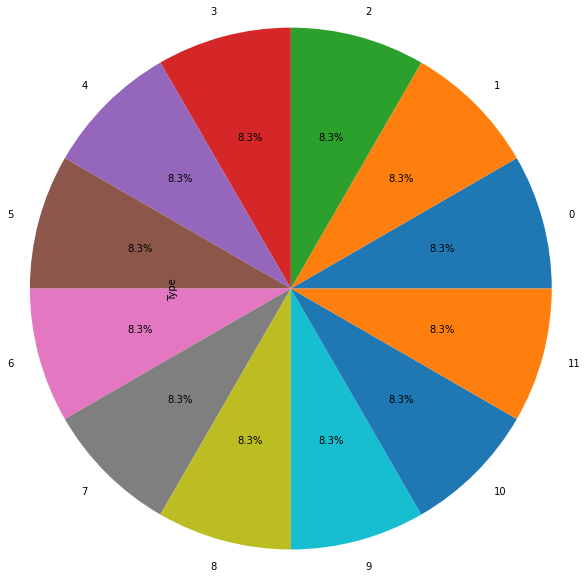

In [18]:
train_data.groupby('Pollen').size().plot(kind='pie',
                                         radius=3,
                                       y = "Pollen",
                                       label = "Type",
                                       autopct='%1.1f%%')

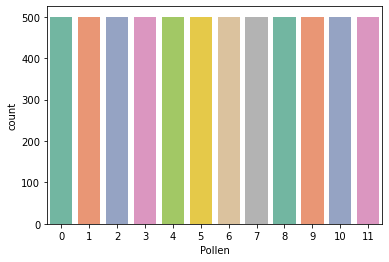

In [19]:
ax = sns.countplot(x="Pollen", data=train_data,palette="Set2")

In [22]:
train_data.describe()

,"350 nm, t=0","364 nm, t=0","379 nm, t=0","393 nm, t=0","408 nm, t=0","422 nm, t=0","437 nm, t=0","451 nm, t=0","466 nm, t=0","480 nm, t=0",...,"672-800 nm, t=20","672-800 nm, t=21","672-800 nm, t=22","672-800 nm, t=23",lt feature 1,lt feature 2,lt feature 3,lt feature 4,size,Pollen
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.00000
mean,0.017517,0.116549,0.228131,0.380130,0.584314,0.775178,0.910941,0.910821,0.801408,0.611507,...,0.011211,0.008374,0.005143,0.002536,0.732468,0.909214,0.413923,0.003213,26.665765,5.50000
std,0.060886,0.094822,0.130609,0.177075,0.196820,0.178155,0.130429,0.122533,0.157971,0.179970,...,0.042358,0.034213,0.037061,0.025813,0.262197,0.184189,0.290376,0.201566,10.263375,3.45234
min,-0.175501,-0.143263,-0.176747,-0.178489,-0.117258,-0.007024,-0.091754,0.028803,0.029040,-0.060012,...,-0.309491,-0.195296,-0.372986,-0.204319,-4.160000,-2.641791,-6.440000,-6.840000,3.846422,0.00000
25%,-0.010396,0.050551,0.137947,0.261260,0.453875,0.674653,0.865714,0.865383,0.713024,0.496894,...,-0.006677,-0.005947,-0.008715,-0.006717,0.547663,0.891869,0.234235,-0.018073,19.276681,2.75000
50%,-0.004223,0.102778,0.218922,0.381167,0.600047,0.811306,0.971295,0.957748,0.821544,0.612681,...,0.005056,0.003645,0.002191,0.000730,0.769307,1.000000,0.373987,0.002263,27.351871,5.50000
75%,0.024868,0.166018,0.307255,0.501112,0.725851,0.908214,1.000000,1.000000,0.923795,0.733390,...,0.019328,0.014721,0.013456,0.007887,1.000000,1.000000,0.570330,0.028768,33.823423,8.25000
max,1.000000,0.920714,0.827468,0.986451,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.389610,0.268398,0.378882,0.173759,1.000000,1.000000,1.000000,1.000000,81.568689,11.00000


In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Columns: 2630 entries, 350 nm, t=0 to Pollen
dtypes: float64(2629), int64(1)
memory usage: 120.6 MB


In [24]:
broj = 0 #ovde gledam koliko ukupno ima nedostajucih vrednosti
for i in range(train_data.shape[1]):
    broj = broj + train_data.isnull().sum()[i]
broj

0

In [25]:
train_no_labels = train_data.drop(['Pollen'], axis=1)
train_no_labels.shape

(6000, 2629)

In [26]:
X=train_no_labels
y=train_data["Pollen"]

# Random Forest:

hyperparameter tuning:

In [27]:
print("Random Forest classifier - Grid search for parameters with cross validation")

parameters = {'n_estimators':[5, 10, 12, 13, 20],
              'criterion':['gini', 'entropy', 'log_loss']}

gs = model_selection.GridSearchCV(estimator=RandomForestClassifier(random_state=0,n_jobs=-1), param_grid=parameters, cv=10)
gs.fit(X,y)
print("Parameters of best score", gs.best_params_)
print("Best score", gs.best_score_)

Random Forest classifier - Grid search for parameters with cross validation
Parameters of best score {'criterion': 'gini', 'n_estimators': 20}
Best score 0.46133333333333343


In [28]:
#opet radimo vanjsku krosvalidaciju

print("RandomForest - Grid search for parameters with cross validation nested in outer cross validation ")
cv_outer = model_selection.ShuffleSplit(3, test_size=0.20, random_state=0)
for i, (train_index, test_index) in enumerate(cv_outer.split(X,y)):
    gs.fit(X.iloc[train_index], y.iloc[train_index])
    print("Fold ", i, "Prameters of best", gs.best_params_, "\tBest score", gs.best_score_)

RandomForest - Grid search for parameters with cross validation nested in outer cross validation 
Fold  0 Prameters of best {'criterion': 'entropy', 'n_estimators': 20} 	Best score 0.458125
Fold  1 Prameters of best {'criterion': 'gini', 'n_estimators': 20} 	Best score 0.4429166666666666
Fold  2 Prameters of best {'criterion': 'gini', 'n_estimators': 20} 	Best score 0.44229166666666664


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
print('Random Forest classifier')
forest = RandomForestClassifier(criterion='gini', n_estimators=20, random_state=0,n_jobs=-1)

forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

print('Misclassified samples: %d' % (y_test != y_pred).sum())

accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy', accuracy)

f1 = metrics.f1_score(y_test, y_pred,average='macro') 
print('F1 score', f1)

Random Forest classifier
Misclassified samples: 672
Accuracy 0.44
F1 score 0.4312299209314591


In [31]:
y_pred2 = forest.predict(test_data)

In [32]:
os.chdir("D:\\Maja\\LSDM\\Projekat")
submission=pd.read_csv('submission.csv')
submission['Pollen']=y_pred2
submission = submission.set_index('ID')

In [33]:
submission.head()

,Pollen
ID,
0,9
1,3
2,5
3,3
4,6


submission.to_csv('sf28.csv') - tacnost na kaggle-u: 37.6%

# XGBClassifier

In [34]:
#NORMALIZACIJA PODATAKA:

sc = preprocessing.MinMaxScaler() 
sc.fit(X_train)

X_train_std = sc.transform(X_train)

X_test_std = sc.transform(X_test)

In [35]:
print('XGBClassifier')
xgb_clf = XGBClassifier()
 
xgb_clf.fit(X_train_std, y_train)
y_pred = xgb_clf.predict(X_test_std)

print('Misclassified samples: %d' % (y_test != y_pred).sum())
accuracy = metrics.accuracy_score(y_test, y_pred)

print('Accuracy', accuracy)
f1 = metrics.f1_score(y_test, y_pred,average='macro') 
print('F1 score', f1)

XGBClassifier
Misclassified samples: 536
Accuracy 0.5533333333333333
F1 score 0.5510738016848065


In [36]:
test_std = sc.transform(test_data)

In [37]:
y_pred3 = xgb_clf.predict(test_std)

In [38]:
os.chdir("D:\\Maja\\LSDM\\Projekat")
submission=pd.read_csv('submission.csv')
submission['Pollen']=y_pred3
submission = submission.set_index('ID')

In [39]:
submission.head()

,Pollen
ID,
0,9
1,9
2,0
3,3
4,6


submission.to_csv('sf30.csv') - tačnost na kaggle-u: 52.1%